# Project: Investigate a Dataset - Gapminder World Data: Exploring GDP, Government Health Spending, Life Expectancy, and Suicides

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li></ul>

<a id='intro'></a>
## Introduction

This analysis uses data from [Gapminder World](https://www.google.com/url?q=http://www.gapminder.org/data/&sa=D&ust=1532469042121000) which has collected a lot of information about how people live their lives in different countries, tracked across the years, and on a number of different indicators. This analysis will use the following indicators.

* **GDP total, yearly growth** _(gdp_total_yearly_growth.csv)_ - based on gapminder's GDP per capita, PPP. _sourceLink: https://www.rug.nl/ggdc/productivity/pwt/_ - [Direct Link](https://www.gapminder.org/tools/#$state$marker$axis_y$which=gdp_total_yearly_growth&domainMin:null&domainMax:null&zoomedMin:null&zoomedMax:null&scaleType=linear&spaceRef:null;;;&chart-type=linechart)


* **Govt. health spending per person (international money)** _(government_health_spending_per_person_international_dollar.csv
)_ - the average health expenditure per person that has been paid by government entities, expressed in international dollars using PPP (Purchasing Power Parity) _sourceLink: https://www.who.int/gho/en_ -  [Direct Link](https://www.gapminder.org/tools/#$state$marker$axis_y$which=government_health_spending_per_person_international_dollar&domainMin:null&domainMax:null&zoomedMin:null&zoomedMax:null&scaleType=log&spaceRef:null;;;&chart-type=linechart)


* **Life expectancy (years)** _(life_expectancy_years.csv)_ - the average number of years a newborn child would live if current mortality patterns were to stay the same. _sourceLink: http://gapm.io/ilex - [Direct Link](https://www.gapminder.org/tools/#$state$marker$axis_y$which=life_expectancy_years&domainMin:null&domainMax:null&zoomedMin:null&zoomedMax:null&scaleType=linear&spaceRef:null;;;&chart-type=bubbles)


* **Suicides (per 100000 people)** _(suicide_per_100000_people.csv)_ - mortality due to self-inflicted injury, per 100,000 standard population, age adjusted. This rate is calculated as if all countries had the same age compostion of the population. _sourceLink: https://ghdx.healthdata.org/gbd-2017_ - [Direct Link](https://www.gapminder.org/tools/#$state$marker$axis_y$which=suicide_per_100000_people&domainMin:null&domainMax:null&zoomedMin:null&zoomedMax:null&scaleType=linear&spaceRef:null;;;&chart-type=bubbles)

### Questions

1. What countries have the highest suicides?
2. What countries have the highest life expectancy?
3. How has life expectancy trended overtime compared to suicides? How has health spending trended?
4. Is there a relationship between government health spending and suicides?

#### Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
#% matplotlib inline # Getting error - UsageError: Line magic function `%` not found.

#### Read in data

In [2]:
# GDP total, yearly growth
gpd_df = pd.read_csv('data/gdp_total_yearly_growth.csv')

# Govt. health spending per person (international $) 
health_df = pd.read_csv('data/government_health_spending_per_person_international_dollar.csv')

# Life expectancy (years)
life_df = pd.read_csv('data/life_expectancy_years.csv')

# Suicides (per 100000 people)
suicide_df = pd.read_csv('data/suicide_per_100000_people.csv')

<a id='wrangling'></a>
## Data Wrangling

### General Properties

#### GDP total, yearly growth

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
# types and look for instances of missing or possibly errant data.
gpd_df.info()
gpd_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Columns: 214 entries, country to 2013
dtypes: float64(213), object(1)
memory usage: 324.5+ KB


,country,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,6.55,12.40,4.56,13.600,2.50,20.20,8.04,6.98,14.80,4.47
1,Albania,0.418,0.418,0.418,0.418,0.418,0.418,0.418,0.418,0.418,...,5.97,5.53,5.77,5.850,7.24,3.28,3.36,2.86,2.64,2.06
2,Algeria,0.356,0.356,0.356,0.356,0.356,0.356,0.356,0.356,0.356,...,5.41,5.38,1.72,3.420,2.02,1.70,3.57,2.31,2.58,2.99
3,Andorra,0.166,0.166,0.166,0.166,0.166,0.166,0.166,0.166,0.166,...,8.64,7.80,4.97,0.161,-4.22,-5.06,-3.43,-2.83,NaN,NaN
4,Angola,0.425,0.425,0.425,0.425,0.425,0.425,0.425,0.425,0.425,...,11.20,20.50,18.60,23.200,13.80,2.39,3.45,3.87,4.96,3.79


#### Govt. health spending per person (international $) 

In [4]:
health_df.info()
health_df.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  190 non-null    object 
 1   1995     187 non-null    float64
 2   1996     188 non-null    float64
 3   1997     188 non-null    float64
 4   1998     189 non-null    float64
 5   1999     189 non-null    float64
 6   2000     189 non-null    float64
 7   2001     189 non-null    float64
 8   2002     188 non-null    float64
 9   2003     188 non-null    float64
 10  2004     188 non-null    float64
 11  2005     188 non-null    float64
 12  2006     188 non-null    float64
 13  2007     188 non-null    float64
 14  2008     188 non-null    float64
 15  2009     188 non-null    float64
 16  2010     185 non-null    float64
dtypes: float64(16), object(1)
memory usage: 25.4+ KB


,country,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.24,2.03,2.51,4.11,4.27,4.91,4.5,5.28,5.18


#### Life expectancy (years)

In [5]:
life_df.info()
life_df.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Columns: 302 entries, country to 2100
dtypes: float64(301), object(1)
memory usage: 441.3+ KB


,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,76.5,76.6,76.7,76.9,77.0,77.1,77.3,77.4,77.5,77.7


#### Suicides (per 100000 people)

In [6]:
suicide_df.info()
suicide_df.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 68 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  104 non-null    object 
 1   1950     10 non-null     float64
 2   1951     17 non-null     float64
 3   1952     19 non-null     float64
 4   1953     19 non-null     float64
 5   1954     20 non-null     float64
 6   1955     29 non-null     float64
 7   1956     29 non-null     float64
 8   1957     30 non-null     float64
 9   1958     32 non-null     float64
 10  1959     32 non-null     float64
 11  1960     33 non-null     float64
 12  1961     37 non-null     float64
 13  1962     35 non-null     float64
 14  1963     39 non-null     float64
 15  1964     37 non-null     float64
 16  1965     35 non-null     float64
 17  1966     36 non-null     float64
 18  1967     40 non-null     float64
 19  1968     39 non-null     float64
 20  1969     40 non-null     float64
 21  1970     39 non-

,country,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.06,5.34,NaN,3.08,NaN,NaN,NaN,NaN,NaN,NaN


### Data Cleaning

Seems like all four imported datasets:
- gdp_total_yearly_growth.csv
- government_health_spending_per_person_international_dollar.csv
- life_expectancy_years.csv
- suicide_per_100000_people.csv)

have `country` in the first column as an object or string with the rest of the columns representing years with data contained as floats. Not all dataframes have the same number of columns or rows so it appears the time span of years as well as the list of countries differs between these dataframes. This isnt a deal breaker as we can try to answer some of the questions with a single dataset. The other research questions might involve merging some of the dataframes together so on second thought lets go ahead right now and try to normalize the `country` and year columns across the four dataframes. 

In [7]:
# lets put all the dataframes in a list to make cleaning easier since they're all somewhat similar in structure 
dfs = [gpd_df, health_df, life_df, suicide_df]

# Let's check for duplicates
for df in dfs:
    print((len(df[df.duplicated(keep=False)])== 0),"- no duplicated rows in df")
    print(df.shape)

True - no duplicated rows in df
(194, 214)
True - no duplicated rows in df
(190, 17)
True - no duplicated rows in df
(187, 302)
True - no duplicated rows in df
(104, 68)


In [8]:
# Let's drop any rows that have NaNs in the whole row
for df in dfs:
    df.dropna(axis=0, how='all', inplace=True)
    print(df.shape)

(194, 214)
(190, 17)
(187, 302)
(104, 68)


In [9]:
# And now let's set the index to the `country` column in them all to make concatenation easier
for df in dfs:
    df.set_index('country', inplace=True)
    print('United States' in df.index, "- a country exists in index") # check that index contains country or 'United States' in the indexs

True - a country exists in index
True - a country exists in index
True - a country exists in index
True - a country exists in index


In [10]:
# strip and lower the columns even though this might not be needed but could eliminate hiding white spaces in the columns
for df in dfs:
    df.rename(columns=lambda x: x.strip().lower(), inplace=True)
gpd_df.head(1)

,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.55,12.4,4.56,13.6,2.5,20.2,8.04,6.98,14.8,4.47


In [11]:
# now lets concatinate all four dataframes on `country`, use names parameter to create a column called dataframe
# which will hold the keys or specifically which dataframe that row of data came from
df = pd.concat(dfs, keys=['gdp', 'health_spend', 'life_exp', 'suicide'], names=['dataframe']).reset_index(level=0).sort_index()
# now let's reset the index to make it easier to slice and view
df.reset_index(inplace=True)

In [12]:
df[df.country == 'United States']

,country,dataframe,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
644,United States,suicide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
645,United States,gdp,3.82,3.56,0.263,1.86,4.02,3.83,2.9,-5.21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
646,United States,life_exp,39.40,39.40,39.400,39.40,39.40,39.40,39.4,39.40,...,87.6,87.7,87.8,87.9,88.0,88.1,88.2,88.3,88.4,88.5
647,United States,health_spend,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Now lets check to make sure that the old values from the four dataframes are in the new concated one
print((df[df['country'] == 'United States']['2004'][645]) == gpd_df['2004']['United States'])
print((df[df['country'] == 'United States']['2004'][646]) == life_df['2004']['United States'])
print(df[df['country'] == 'United States']['2004'][644] == suicide_df['2004']['United States'])
print(df[df['country'] == 'United States']['2004'][647] == health_df['2004']['United States'])

True
True
True
True


In [14]:
df.shape
# Now let's trim this down a bit

(675, 303)

In [15]:
# the combined dataframe has more columns now since one of the dataframes had projected data in it
df.columns.sort_values()[-20:]

Index(['2083', '2084', '2085', '2086', '2087', '2088', '2089', '2090', '2091',
       '2092', '2093', '2094', '2095', '2096', '2097', '2098', '2099', '2100',
       'country', 'dataframe'],
      dtype='object')

In [16]:
# let's drop those future columns from 2021 and beyond
df.drop(axis=1, labels=list(df.columns.sort_values()[(int(np.where(df.columns.sort_values() == '2021')[0])):-2]), inplace=True) # drop all years beyond 2020
df.head()

,country,dataframe,1801,1802,1803,1804,1805,1806,1807,1808,...,2012,2013,1800,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,gdp,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,14.80,4.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,life_exp,28.200,28.200,28.200,28.200,28.200,28.100,28.100,28.100,...,60.80,61.30,28.2,61.2,61.2,61.2,63.4,63.7,64.1,64.4
2,Afghanistan,health_spend,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,gdp,0.418,0.418,0.418,0.418,0.418,0.418,0.418,0.418,...,2.64,2.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Albania,life_exp,35.400,35.400,35.400,35.400,35.400,35.400,35.400,35.400,...,77.80,77.90,35.4,77.9,78.0,78.1,78.2,78.3,78.5,78.6


In [17]:
# Now we have a combined dataframe merged on `country` with each country containing a row of data from each of the
# four dataframes that we are analyzing. We have another column titled 'dataframe' which indicates which original
# dataset that row of data came from. We also have years filling out the rest of the columns going from 1801 to 2020
# and we reset the index. No we can use filtering, querying or other means to select subsets of the data very easily.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Columns: 223 entries, country to 2020
dtypes: float64(221), object(2)
memory usage: 1.1+ MB


In [18]:
df.head(10)

,country,dataframe,1801,1802,1803,1804,1805,1806,1807,1808,...,2012,2013,1800,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,gdp,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,14.80,4.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,life_exp,28.200,28.200,28.200,28.200,28.200,28.100,28.100,28.100,...,60.80,61.30,28.2,61.2,61.2,61.2,63.4,63.7,64.1,64.4
2,Afghanistan,health_spend,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,gdp,0.418,0.418,0.418,0.418,0.418,0.418,0.418,0.418,...,2.64,2.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Albania,life_exp,35.400,35.400,35.400,35.400,35.400,35.400,35.400,35.400,...,77.80,77.90,35.4,77.9,78.0,78.1,78.2,78.3,78.5,78.6
5,Albania,suicide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Albania,health_spend,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Algeria,life_exp,28.800,28.800,28.800,28.800,28.800,28.800,28.800,28.800,...,76.80,76.90,28.8,77.0,77.1,77.4,77.7,77.9,78.1,78.3
8,Algeria,health_spend,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Algeria,gdp,0.356,0.356,0.356,0.356,0.356,0.356,0.356,0.356,...,2.58,2.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 - What countries have the highest suicides?

So let's start answering the questions, first addressing what countries have the highest suicides. We'll grab the data and whittle it down a bit so that we are focusing our attention on the top 20 ranked countries. We'll achieve this by filtering down to the last 100 years (1920-2020), dropping the rows that have a higher than average count of NaNs in the row compared to the total subset so we have a more complete dataset and then return the top 20. We'll use a horizontal bar chart to communicate the top 20 ranking. Focusing on the top 20 gives you more space in your figure to visualize the needed data and make it more readable for the end consumer than if we didnt. We used the mean across the years to get the average suicides (per 100000 people) for each country. You could have easily just summed it up and rank but I wanted to try to account for swings in the data and really analyze the long, steady trend of suicides (per 100000 people) for these countries hence the mean but completely subjective here. In the figure below you'll see Lithuania at 32.6, Hungary 27.5, and Lativia 24.7 ranked the highest in suicides per 10000 people.

In [19]:
# first let's select a subset of rows from the dataframe that contain the suicide data we need
s_df = df.query('dataframe == "suicide"')

In [20]:
# drop any rows with NaN in all of it
s_df = s_df.dropna(axis=0, how='all' )
s_df.shape

(104, 223)

In [21]:
# Let's also look at the last 100 years and since this is all suicide data we can drop the `dataframe` column as well
# We'll throw this into a function since we'll use it again
def last_100(df):
    """Takes a dataFrame object with 'YYYY' datetime columns
    and drops columns before year `1920` and returns modified dataframe."""
    try:
        labels = list(df.columns.sort_values()[0:(int(np.where(df.columns.sort_values() == '1920')[0]))])+['dataframe'] # assign the columns we want to drop
        df.drop(axis=1, labels=labels, inplace=True)
        return df
    except:
        "error"

In [22]:
s_df = last_100(s_df)
s_df.country.nunique()

104

In [23]:
s_df.head()
s_df.set_index('country', inplace=True)

In [24]:
# Looks like we have 104 unique countries or rows so lets see how many of them have NaNs across the years or columns
# instead of having data in them
s_df.isnull().sum(axis=1)

country
Albania                 82
Antigua and Barbuda    100
Argentina               76
Armenia                 74
Australia               36
                      ... 
United Kingdom          36
United States           43
Uruguay                 68
Uzbekistan              78
Venezuela               63
Length: 104, dtype: int64

In [25]:
avg_nan = s_df.isnull().sum(axis=1).mean()
avg_nan
# the average number of NaNs across all the columns is 74..

72.23076923076923

In [26]:
# so let's grab those rows that have less NaNs then the mean, meaning they have more than the average number
# of columns with data in them so a more complete dataset
s_df2_index = s_df.isnull().sum(axis=1)[s_df.isnull().sum(axis=1) < avg_nan].index

# filter the df index by the list of rows above and return those rows into a new variable
s_df2 = s_df[s_df.index.isin(s_df2_index)]

s_df2.shape
# now we still have 103 columns of data or from years 1920 to 2020 and we have 46 rows or countries

(46, 101)

In [27]:
# Now lets get the mean suicides (per 100000 people) across the rows or per country and sort the values
# We'll also return only the top 20 to make graphing cleaner
s_df2_index = s_df2.mean(axis=1).sort_values(ascending=False)[:20].index

# filter the df index again by the list of rows above and return those rows into a new variable
s_df2 = s_df[s_df.index.isin(s_df2_index)]
s_df2.shape

(20, 101)

In [28]:
# groupby country, average across the rows and sort
data = s_df2.mean(axis=1).sort_values()

#### What countries have the  highest suicides?

Suicides (per 100000 people) - mortality due to self-inflicted injury, per 100,000 standard population, age adjusted.This rate is calculated as if all countries had the same age compostion of the population.

sourceLink: https://ghdx.healthdata.org/gbd-2017


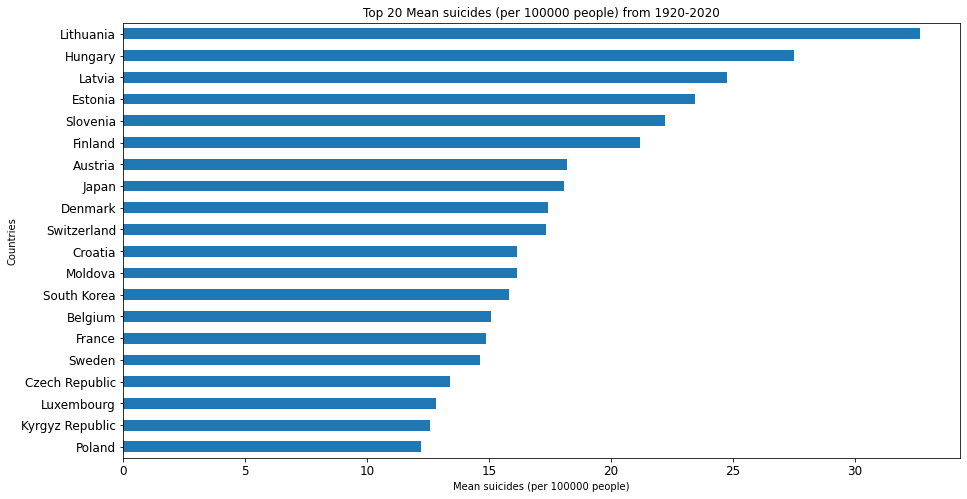

In [29]:
# plot the data
ax = data.plot(kind='barh', 
          figsize = (15,8), 
          title='Top 20 Mean suicides (per 100000 people) from 1920-2020',
          fontsize = 12
         );
ax.set_xlabel('Mean suicides (per 100000 people)')
ax.set_ylabel('Countries')
text = (
    f"Suicides (per 100000 people) - mortality due to self-inflicted injury, per 100,000 standard population, age adjusted."
    f"This rate is calculated as if all countries had the same age compostion of the population.\n\n"
    f"sourceLink: https://ghdx.healthdata.org/gbd-2017"
)
print(text)

### Research Question 2 - What countries have the highest life expectancy?

Now that we've finished addressing what countries have the highest suicides it's time to see what countries have the highest life expectancy. We'll grab the data and reduce it as before filtering down to the last 100 years (1920-2020), dropping the rows that have a higher than average count of NaNs in the row compared to the total subset so we have a more complete dataset and then return the top 20. We'll continue using a horizontal bar chart to communicate the top 20 ranking and again used a mean which actually makes more sense here. We'll also adjust the x-min since all the countries in the top 20 are very close in value which makes it difficult seeing the difference in the chart below when the x-min on the x-axis is zero so we'll move it to half of the overall mean of the dataset and then add a buffer to the x-max as well to stretch out the scale of the x-axis and make it easier to consume the chart. The countries with the highest life expectancy are Sweden with 73.5, Norway 73.2 years, and Netherlands at 72.9 years a newborn child would live.

In [30]:
# first let's select a subset of rows from the dataframe that contain the suicide data we need
lf_df = df.query('dataframe == "life_exp"')
lf_df

,country,dataframe,1801,1802,1803,1804,1805,1806,1807,1808,...,2012,2013,1800,2014,2015,2016,2017,2018,2019,2020
1,Afghanistan,life_exp,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,60.8,61.3,28.2,61.2,61.2,61.2,63.4,63.7,64.1,64.4
4,Albania,life_exp,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,77.8,77.9,35.4,77.9,78.0,78.1,78.2,78.3,78.5,78.6
7,Algeria,life_exp,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,...,76.8,76.9,28.8,77.0,77.1,77.4,77.7,77.9,78.1,78.3
10,Andorra,life_exp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,82.4,82.5,NaN,82.5,82.6,82.7,82.7,NaN,NaN,NaN
14,Angola,life_exp,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,61.3,61.9,27.0,62.8,63.3,63.8,64.2,64.6,65.0,65.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660,Venezuela,life_exp,32.2,32.2,32.2,32.2,32.2,32.2,32.2,32.2,...,75.2,75.2,32.2,75.0,75.0,75.3,75.3,75.2,75.1,75.1
664,Vietnam,life_exp,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,...,73.8,74.0,32.0,74.1,74.3,74.4,74.5,74.6,74.7,74.8
667,Yemen,life_exp,23.4,23.4,23.4,23.4,23.4,23.4,23.4,23.4,...,68.3,68.9,23.4,69.0,68.6,68.1,68.1,68.1,68.1,68.2
670,Zambia,life_exp,32.6,32.6,32.6,32.6,32.6,32.6,32.6,32.6,...,58.8,60.0,32.6,61.1,62.0,62.8,63.2,63.7,64.0,64.3


In [31]:
# drop any rows with NaN in all of it
lf_df = lf_df.dropna(axis=0, how='all' )
lf_df.shape

(187, 223)

In [32]:
# Let's also look as before at the last 100 years and we can drop the `dataframe` column as well
lf_df = last_100(lf_df)
# set index
lf_df.set_index('country', inplace=True)

lf_df.shape

(187, 101)

In [33]:
# Looks like we have 187 unique countries or rows so lets see how many of them have NaNs across the years or columns
# instead of having data in them
lf_df.isnull().sum(axis=1)

country
Afghanistan     0
Albania         0
Algeria         0
Andorra        53
Angola          0
               ..
Venezuela       0
Vietnam         0
Yemen           0
Zambia          0
Zimbabwe        0
Length: 187, dtype: int64

In [34]:
# so let's grab those rows that have less NaNs then the mean, meaning they have more than the average number
# of columns with data in them so a more complete dataset
avg_nan = round(lf_df.isnull().sum(axis=1).mean())

lf_df2_index = lf_df.isnull().sum(axis=1)[lf_df.isnull().sum(axis=1) < avg_nan].index

# filter the df index by the list of rows above and return those rows into a new variable
lf_df2 = lf_df[lf_df.index.isin(lf_df2_index)]

lf_df2.shape
# now we still have 103 columns of data or from years 1920 to 2020 and we have 184 rows or countries

(184, 101)

In [35]:
# Now lets get the mean life expectancy (years)across the rows or per country and sort the values
# We'll also return only the top 20 to make graphing cleaner
lf_df2_index = lf_df2.mean(axis=1).sort_values(ascending=False)[:20].index

# filter the df index again by the list of rows above and return those rows into a new variable
lf_df2 = lf_df[lf_df.index.isin(lf_df2_index)]
lf_df2.shape

(20, 101)

In [36]:
# groupby country, average across the rows and sort
data = lf_df2.mean(axis=1).sort_values()

#### What countries have the highest life expectancy?

Life expectancy (years) - the average number of years a newborn child would live if current mortality patterns were to stay the same.

sourceLink: http://gapm.io/ilex


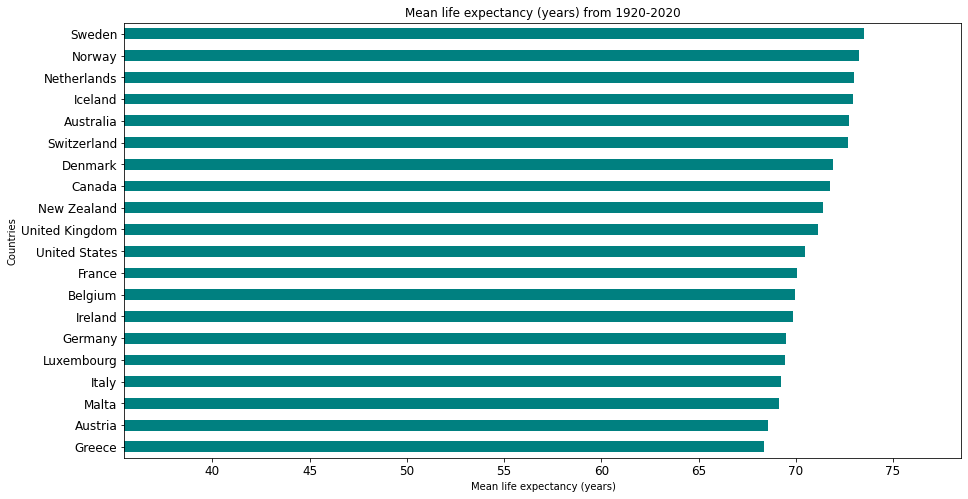

In [37]:
# plot the data 
ax = data.plot(kind='barh', 
          figsize = (15,8), 
          title='Mean life expectancy (years) from 1920-2020',
          fontsize = 12,
          xlim= (data.mean()/2, data.max()+ 5),
          color='teal',
         );
ax.set_xlabel('Mean life expectancy (years)')
ax.set_ylabel('Countries')
text = (
    f"Life expectancy (years) - the average number of years a newborn child would live"
    f" if current mortality patterns were to stay the same.\n\n"
    f"sourceLink: http://gapm.io/ilex"
)
print(text)

### Research Question 3 - How has life expectancy trended overtime compared to suicides?

With highest life expectancy done it's time to look into some trends. Here we are going to be comparing life expectancy and suicides trended over a time series of years. We'll use the mean as the statistics to calculate and visualize over time. Since the suicide data isnt as complete as the life expectancy dataset we'll trim the timeframe down from 1920 to 2020 to a shorter 1950 to 2020. And since we are graphing time series we'll look at government health spending per person over time as well. Line charts are great for this and what the results show is a slow and steady rise in life expectancy, a decreasing downward trend in suicides, and a rapid growth in government health spending per person.

In [38]:
# Lets create a dataframe to load the data 
data = pd.DataFrame()
data['life_exp'] = lf_df2.mean()
data['suicides'] = s_df2.mean()

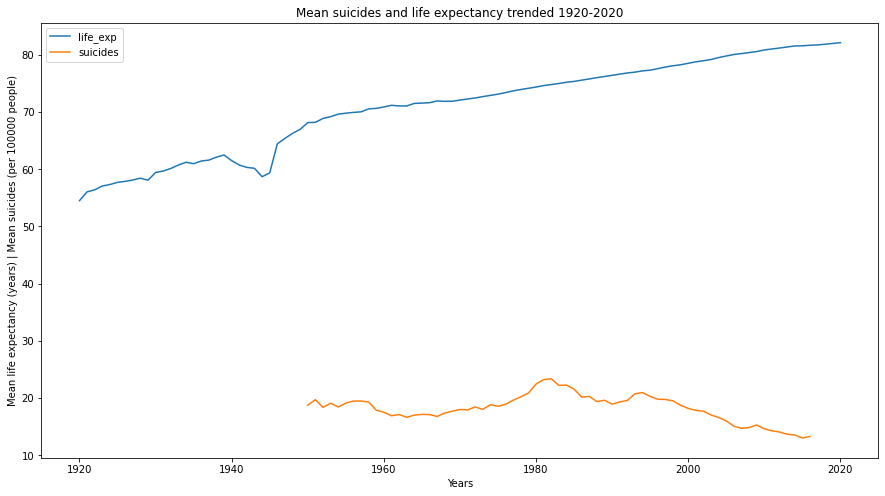

In [39]:
# Lets graph the combined data over time
ax = data.plot(kind='line',
          figsize=(15,8),
          title='Mean suicides and life expectancy trended 1920-2020');
ax.set_xlabel('Years')
ax.set_ylabel('Mean life expectancy (years) | Mean suicides (per 100000 people)');

In [40]:
# In the graph we see some missing suicide data
s_df2.columns[s_df2.isnull().all(axis=0)]

# and can see it's for these years...

Index(['1920', '1921', '1922', '1923', '1924', '1925', '1926', '1927', '1928',
       '1929', '1930', '1931', '1932', '1933', '1934', '1935', '1936', '1937',
       '1938', '1939', '1940', '1941', '1942', '1943', '1944', '1945', '1946',
       '1947', '1948', '1949', '2017', '2018', '2019', '2020'],
      dtype='object')

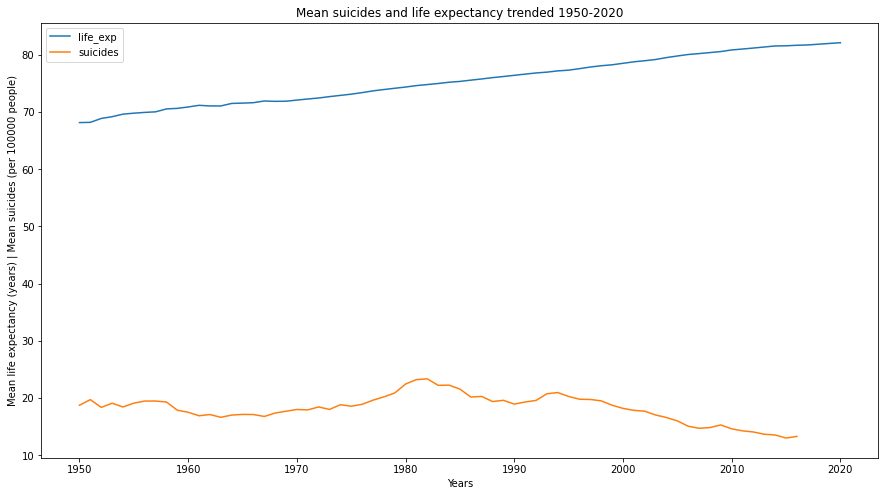

In [41]:
# Lets forgot about those empty years...
ax = data['1950':].plot(kind='line',
          figsize=(15,8),
          title='Mean suicides and life expectancy trended 1950-2020');
ax.set_xlabel('Years')
ax.set_ylabel('Mean life expectancy (years) | Mean suicides (per 100000 people)');

While we are at it let's peek at how health spending has trended over the years..

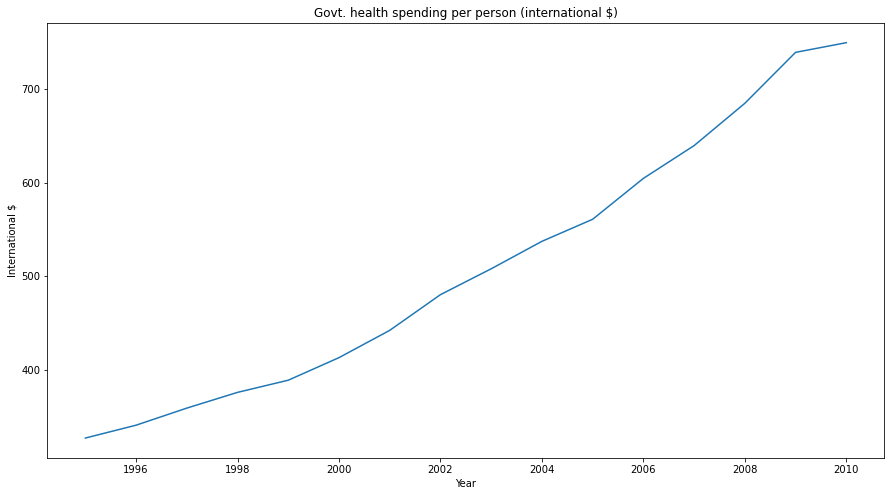

In [42]:
# Pull in the health spending data
he_df = df.query('dataframe == "health_spend"')

# drop any rows with NaN in all of it
he_df = he_df.dropna(axis=0, how='all' )

# Let's also look as before at the last 100 years and we can drop the `dataframe` column as well
he_df = last_100(he_df) # uses the `last_100` function

# Assign the needed data to a variable
data = he_df.mean()

# Lets graph the combined data over time
ax = data.plot(kind='line',
          figsize=(15,8),
          title='Govt. health spending per person (international $)');
ax.set_xlabel('Year')
ax.set_ylabel('International $');

### Research Question 4 - Is there a relationship between GDP and suicides?

Coming to the end of this analysis we'll explore the association between GDP and suicides. Scatter plots are the bee's-knees when exploring these types of associations so we'll use one here to plot GDP on the X and suicides on the Y axis. We'll go ahead and re-use the Top 20 Mean suicides (per 100000 people) from 1920-2020 dataset in the `s_df2.shape` variable which means we'll have to reduce the GDP dataset to just those 20 countries. After grabbing and wrangling the data we'll sum up across the years, concatinate on the top 20 countries and then graph the scatter plot. This plot will show that a faint positive relationship may exist between the two.

In [43]:
# Create a new dataframe and pull in the GDP data
gdp_df = df.query('dataframe == "gdp"')

In [44]:
# drop any rows with NaN in all of it
gdp_df = gdp_df.dropna(axis=0, how='all' )
# Only look at the last 100 years and drop `dataframe` column
gdp_df = last_100(gdp_df)
# Set the index to `country`
gdp_df.set_index('country', inplace=True)
gdp_df.shape

(194, 101)

In [45]:
s_df2.shape

(20, 101)

In [46]:
# Since the s_df2 dataframe only has 20 countries, the top 20 by suicides, let's filter gdp_df down to the same countries
labels = [c for c in list(gdp_df.index) if c not in list(s_df2.index)]
# Then we can drop those rows stores in the `label` variable
gdp_df = gdp_df.drop(labels=labels, axis=0)

In [47]:
# Now let's sum up across the years
sui = s_df2.sum(axis=1)
gdp = gdp_df.sum(axis=1)
# And then combine by concatination
data = pd.concat([sui,gdp], axis=1, keys=['suicides','gdp'])
data

,suicides,gdp
country,,
Austria,1128.85,305.89440
Belgium,936.20,298.63970
Croatia,517.20,237.00819
Czech Republic,415.70,216.81230
Denmark,1130.94,259.59570
Estonia,774.10,362.15530
Finland,1335.80,327.66130
France,951.80,273.24418
Hungary,1706.40,203.85250


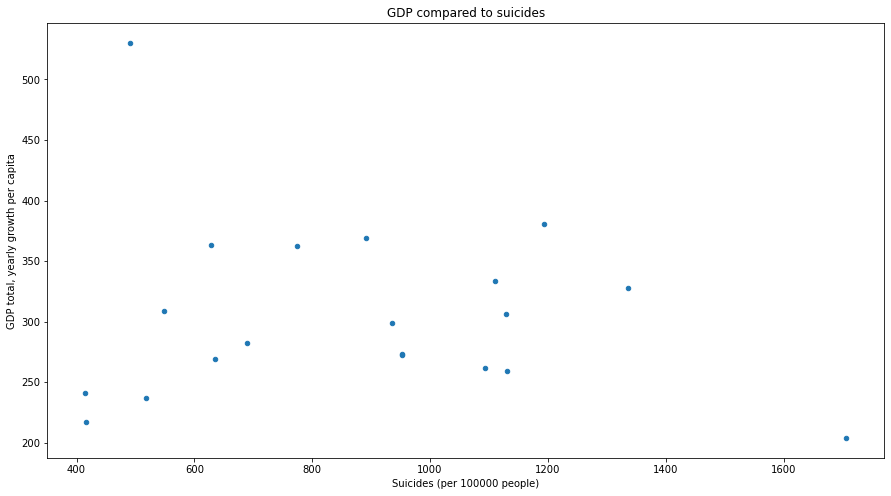

In [48]:
# And now we can graph
ax = data.plot(kind='scatter',
               x='suicides',
               y='gdp',
               figsize=(15,8),
               title='GDP compared to suicides');
ax.set_xlabel('Suicides (per 100000 people)')
ax.set_ylabel('GDP total, yearly growth per capita');

<a id='conclusions'></a>
## Conclusions

In conclusion, when looking at what countries have the highest suicides in appears based on the data that Lithuania, Hungary, and Lativia rank the highest with 32.6, 27.5, and 24.7 suicides per 10000 people respectively.


The countries with the highest life expectancy based on the data used appears to favor nordic countries such as Sweden with 73.5 number of years a newborn child would live, Norway 73.2 years, and Netherlands at 72.9, followed by Iceland at 72.9.


When exploring life expectancy trended overtime compared to suicides one can see life expectancy trending mostly positively through out the years starting a long trend from 1950 to current day. Compared to suicides one can see them peaking around the 1980's but have since steadily decreased. 


Finally, when comparing the countries with the highest suicides to see if there is a relationship between GDP and suicides it appears that a faint positive relationship may exist between the two but the data this is based on does appear to have some outliers, both countries with GDP and low suicides and low GDP and many suicides, which would have to be explored further to see if it makes sense to keep them in the analysis.

#### Limitations
Further univariate analysis of both the GDP and suicide data would be needed to explore deeper any outliers, extreme variance, or other errors in the data. I would also like to explore the collection methods and timeframe for the data sets to make sure that they are the best suited to explore these relationships. For example, the less complete or less years collected of the suicide data could indicate sub-optimal collection methods and their may be a more complete data set available. Additionally, I would like to use stats like, pearson r , to specifically quantify the association between these variables.